In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData
from utilsData import fuelDict, getISO

In [3]:
dfISO, numGenerators, totalCap, __ = getISO()

Total Capacity:  38909.853134000026 Number of Generators:  1100 Total CSO:  31304.248000000032


In [4]:
cap_rate = 1.0
genCos = getGenCos(dfISO, esCharge=1)
plt.rcParams.update({'font.size': 15})

{'Landfill Gas': 50.21099999999999, 'Gas': 15024.574, 'Hydro': 3023.4119999999994, 'Oil': 4973.496999999999, 'Refuse/Woods': 734.3950000000001, 'Nuclear': 3333.1130000000003, 'Coal': 438.0, 'Wind': 281.55499999999995, 'Gas-Other': 3.7969999999999997, 'Solar': 1.9660000000000002, 'ES': 22.711000000000006, 'Demand': 3514.0669999999977}
{'Landfill Gas': 88.63034999999999, 'Gas': 17713.101769000004, 'Hydro': 3555.623715, 'Oil': 6477.61851, 'Refuse/Woods': 1069.70509, 'Nuclear': 3606.65085, 'Coal': 559.16035, 'Wind': 898.4563499999998, 'Gas-Other': 9.951, 'Solar': 991.5863500000007, 'ES': 59.27799999999999, 'Demand': 3880.0907999999954}


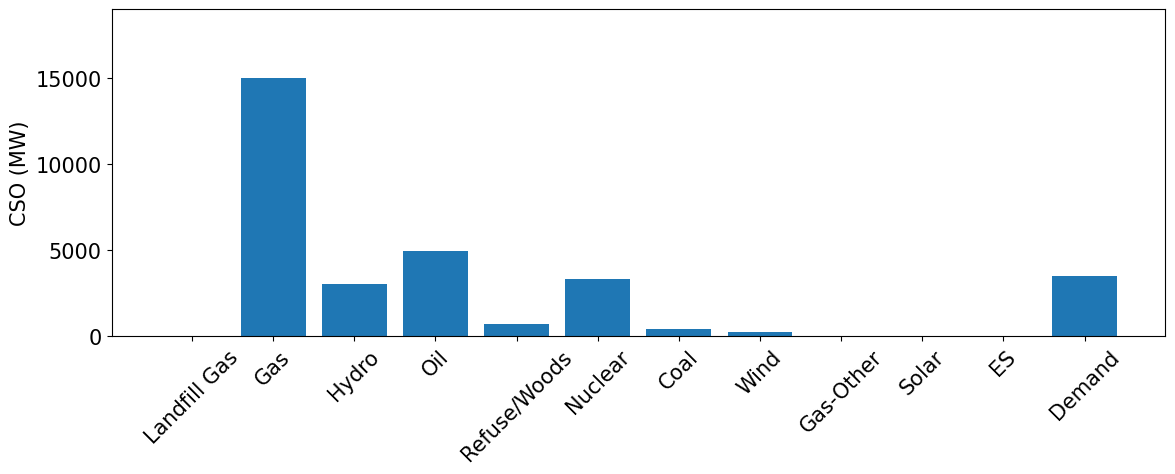

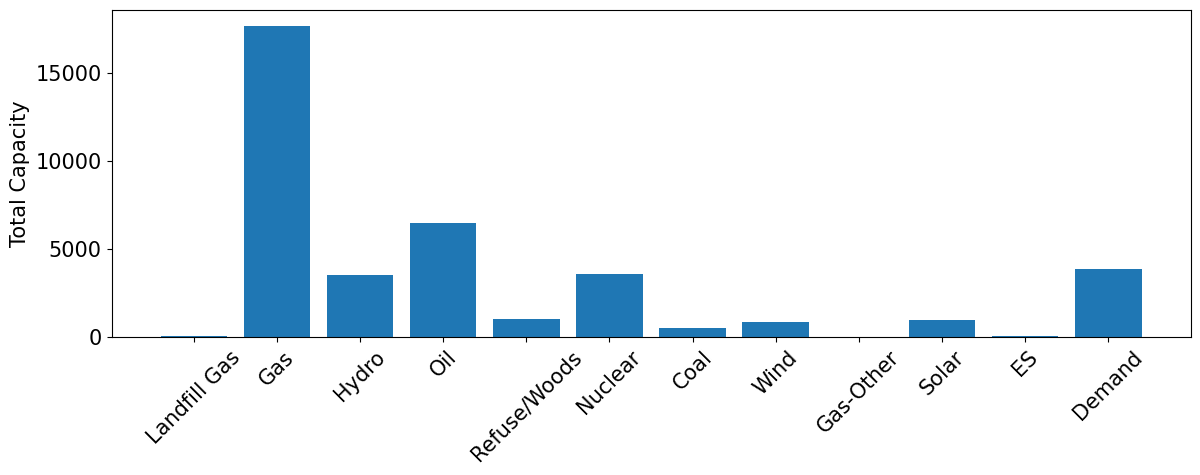

In [5]:
for month in ['January']:
    for gen in genCos: gen.updateCSO(dfISO, month);
    
    plt.figure(figsize=(12, 5))
    # plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    # plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)
    plt.xticks(rotation=45)  # Rotates x-axis labels by 45 degrees
    plt.tight_layout() 

    plt.savefig('Figs/SystemDetails1.png')

    plt.figure(figsize=(12, 5))

    # plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    # plt.bar(labels2, np.array(weights) / np.array(weights2))
    plt.bar(labels2, np.array(weights2))
    plt.xticks(rotation=45)  # Rotates x-axis labels by 45 degrees
    plt.tight_layout() 

    # plt.ylim(0, 19000)
    # plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');
    plt.savefig('Figs/SystemDetails2.png')

In [6]:
__, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
                                                                        load_rate='medium', vre_mix='medium')
numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
genCos = getGenCos(dfISO, esCharge=1)

{'Landfill Gas': 55.318014011915956, 'Gas': 11055.5087715668, 'Hydro': 2219.2177113987555, 'Oil': 4042.960357259405, 'Refuse/Woods': 667.648961752242, 'Nuclear': 2251.0659413664575, 'Coal': 348.9960276159107, 'Wind': 10965.986352388261, 'Gas-Other': 6.210847158254206, 'Solar': 12102.671856361738, 'ES': 2000.0000000000005, 'Demand': 2421.7315766202682, 'LD': 500.0}
{'Landfill Gas': 55.318014011915956, 'Gas': 11055.5087715668, 'Hydro': 2219.2177113987555, 'Oil': 4042.960357259405, 'Refuse/Woods': 667.648961752242, 'Nuclear': 2251.0659413664575, 'Coal': 348.9960276159107, 'Wind': 10965.986352388261, 'Gas-Other': 6.210847158254206, 'Solar': 12102.671856361738, 'ES': 2000.0000000000005, 'Demand': 2421.7315766202682, 'LD': 500.0}


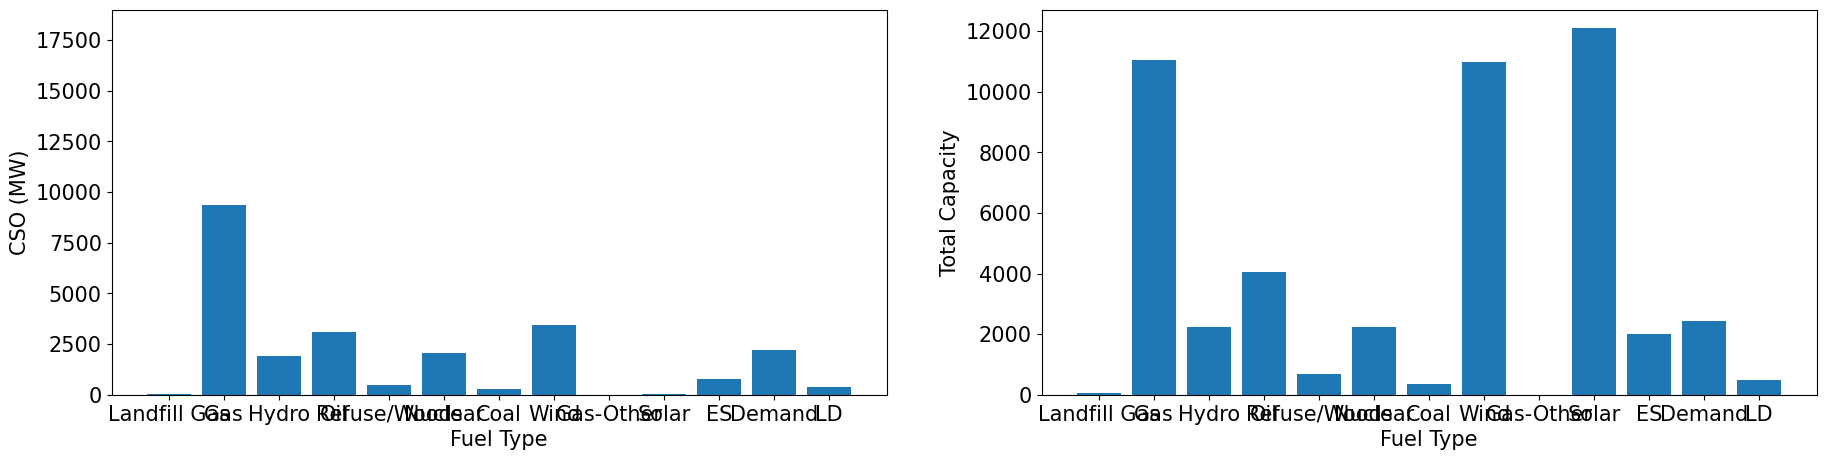

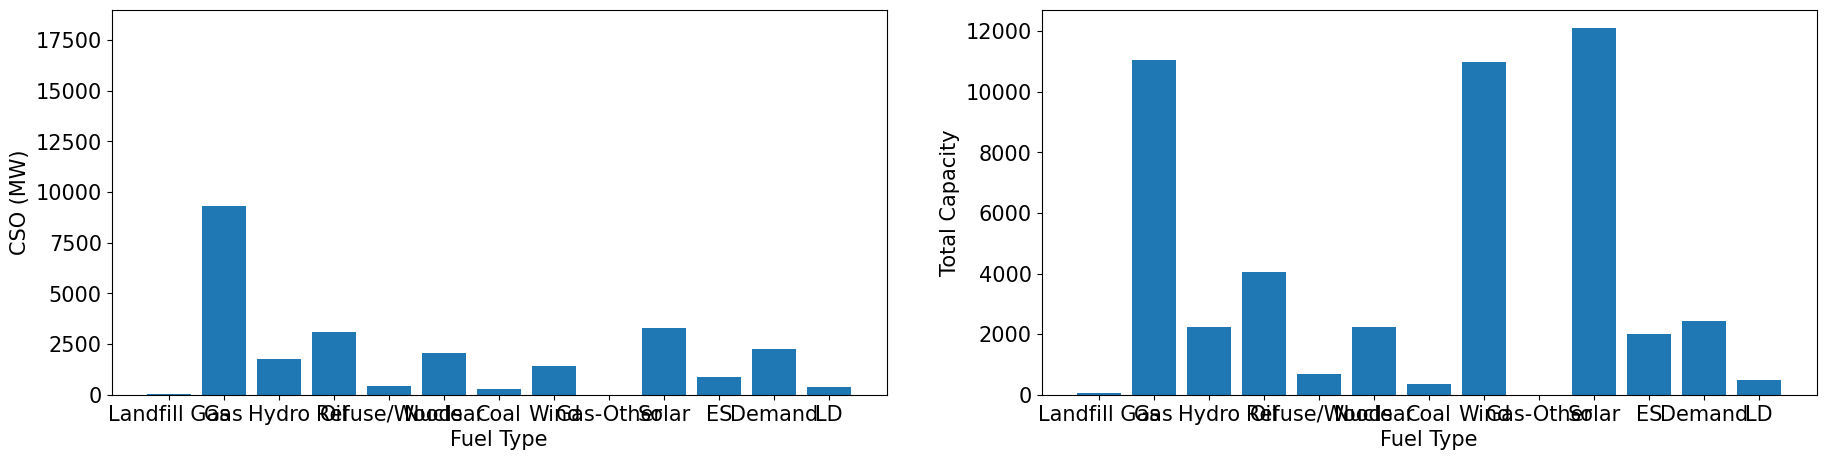

In [7]:
for month in ['January', 'July']:    
    for gen in genCos: gen.updateCSO(dfISO, month);

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 2, 1)
    csoHist = {}
    for genco in genCos:
        temp = genco.CapObl

        if genco.fuelType in csoHist:
            csoHist[genco.fuelType] += temp
        else:
            csoHist[genco.fuelType] = temp
    # print(csoHist)

    labels = list(csoHist.keys())
    weights = list(csoHist.values())

    plt.bar(labels, weights)
    plt.xlabel('Fuel Type')
    plt.ylabel('CSO (MW)');
    plt.ylim(0, 19000)

    plt.subplot(1, 2, 2)
    capHist = {}
    for genco in genCos:
        temp = genco.MaxCap

        if genco.fuelType in capHist:
            capHist[genco.fuelType] += temp
        else:
            capHist[genco.fuelType] = temp
    print(capHist)

    # del capHist['Other']; del csoHist['Waste']
    # del csoHist['Other']; del capHist['Waste']
    labels = list(csoHist.keys())
    weights = list(csoHist.values())
    labels2 = list(capHist.keys())
    weights2 = list(capHist.values())

    # plt.bar(labels2, np.array(weights) / np.array(weights2))
    plt.bar(labels2, np.array(weights2))
    # plt.ylim(0, 19000)
    plt.xlabel('Fuel Type')
    plt.ylabel('Total Capacity');

CSC per Hour

In [8]:
plt.rcParams.update({'font.size': 15})

In [9]:
import csv
import pandas as pd

# Open the CSV file
with open('Payments/log.csv', mode='r') as file:
    # Skip the first two rows
    next(file)  # Skip the first row
    next(file)  # Skip the second row
    load_info = next(file)  # Skip the third row

    # Use the third row as headers (fieldnames)
    fieldnames = next(file).strip().split(',')

    # Create a DictReader with the correct headers
    csv_reader = csv.DictReader(file, fieldnames=fieldnames)

    # Read the remaining rows into a list of dictionaries
    log_data = [row for row in csv_reader]

load_info = load_info[8:-1]
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(log_data)
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')



# Extract month and hour from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Hour'] = df['hour']
df['Hour'] = df['Hour'].astype(int)

/tmp/ipykernel_14969/153581222.py:6: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfHourlyLoadAdj['Date'] = pd.to_datetime(dfHourlyLoadAdj['Date'], dayfirst=True)


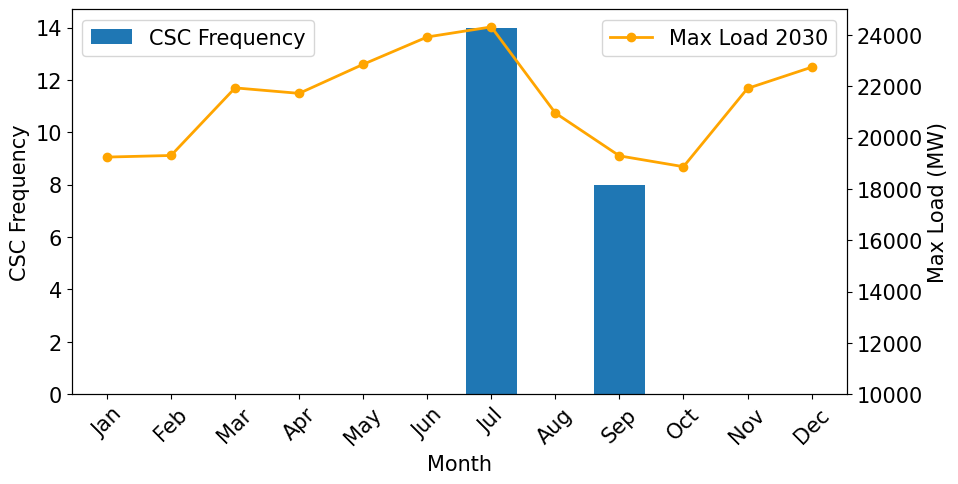

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
dfHourlyLoadAdj = pd.read_csv('data/forecast/load_rate_' + load_info + '/dfHourlyDemand2030.csv')
dfHourlyLoadAdj['Date'] = pd.to_datetime(dfHourlyLoadAdj['Date'], dayfirst=True)
dfHourlyLoadAdj['Month'] = dfHourlyLoadAdj['Date'].dt.month
max_load_per_month = dfHourlyLoadAdj.groupby('Month')['Total Load'].max()

# Bar plot data
data = df['Month'].value_counts()
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(data.index, data.values, label='CSC Frequency')
ax1.set_xlabel('Month')
ax1.set_ylabel('CSC Frequency')
ax1.set_xticks(range(1, 13))  # Ensure months 1-12 are labeled
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Create the secondary y-axis (for the line plot)
ax2 = ax1.twinx()
ax2.plot(max_load_per_month.index, max_load_per_month.values, marker='o', linestyle='-', 
         linewidth=2, color='orange', label='Max Load 2030')
ax2.set_ylabel('Max Load (MW)')
ax2.set_ylim(10000, 25000)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
# plt.title('Frequency of Events per Month and Maximum Load')
plt.savefig('Figs/CSC_Frequency_Monthly.png')
plt.show()


In [35]:
list(dfHourlyLoadAdj.groupby('Hour Ending')['Total Load'].mean())
# dfHourlyWind.groupby('local_hour_end')['tot_wind_mwh'].mean(), 
# dfHourlySolar.groupby('LOCAL_HOUR_END')['tot_solar_mwh'].mean()

[12563.71761850391,
 12285.32503741896,
 12124.759828508259,
 12082.628482643744,
 12218.099015436634,
 12616.592010257062,
 13445.838683084332,
 14030.614861919386,
 13964.350723035888,
 13649.497538864955,
 13445.589772457915,
 13409.44223416041,
 13474.593565813917,
 13683.651048201904,
 13991.709952089903,
 14533.581469210942,
 15389.176295488976,
 16248.987583476131,
 16549.697817594955,
 16403.07019767644,
 15968.077029630573,
 15162.030464154604,
 14061.831832332957,
 13075.280472041948]

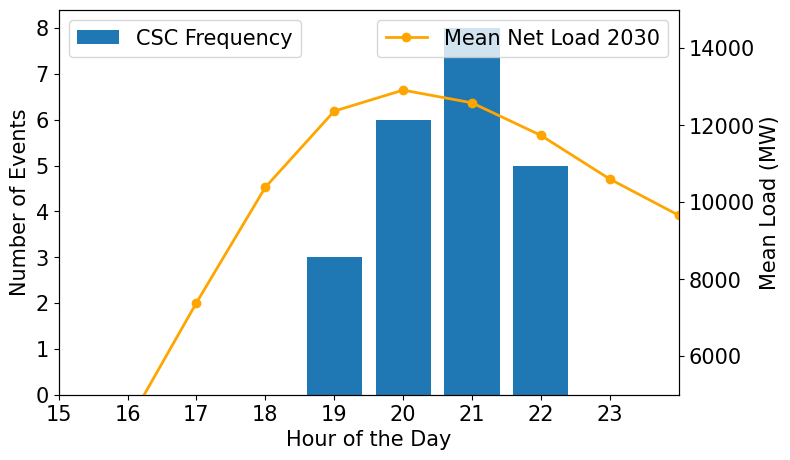

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
dfHourlyWind = pd.read_csv('data/forecast/load_rate_' + load_info + '/vre_low/dfHourlyWind.csv')
dfHourlyWind['Date'] = pd.to_datetime(dfHourlyWind['local_day'], dayfirst=True)
dfHourlyWind['Month'] = dfHourlyWind['Date'].dt.month
dfHourlyWind = dfHourlyWind[dfHourlyWind['local_hour_end'] != '02X']



dfHourlySolar = pd.read_csv('data/forecast/load_rate_' + load_info + '/vre_low/dfHourlySolar.csv')
dfHourlySolar['Date'] = pd.to_datetime(dfHourlySolar['local_day'], dayfirst=True)
dfHourlySolar['Month'] = dfHourlySolar['Date'].dt.month
dfHourlySolar = dfHourlySolar[dfHourlySolar['LOCAL_HOUR_END'] != '02X']


# Ensure 'Hour' is numeric and fill missing values with 0
hour_counts = df['Hour'].astype(int).value_counts().reindex(range(24), fill_value=0)
dfHourlyLoadAdj = dfHourlyLoadAdj[dfHourlyLoadAdj['Hour Ending'] != '02X']
dfHourlyLoadAdj['Hour Ending'] = dfHourlyLoadAdj['Hour Ending'].astype(int)

# Calculate mean load per hour
mean_load_per_hour = dfHourlyLoadAdj.groupby('Hour Ending')['Total Load'].mean().values -\
                    dfHourlyWind.groupby('local_hour_end')['tot_wind_mwh'].mean().values -\
                          dfHourlySolar.groupby('LOCAL_HOUR_END')['tot_solar_mwh'].mean().values

fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot the bar chart on the primary y-axis
ax1.bar(hour_counts.index, hour_counts.values, label='CSC Frequency')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Events')
ax1.set_xticks(range(24))  # Ensure all 24 hours are labeled on the x-axis
ax1.tick_params(axis='y')

# Create the secondary y-axis (for the line plot)
ax2 = ax1.twinx()
ax2.plot(dfHourlyLoadAdj.groupby('Hour Ending')['Total Load'].mean().index, mean_load_per_hour, marker='o', linestyle='-', 
         linewidth=2, color='orange', label='Mean Net Load 2030')
ax2.set_ylabel('Mean Load (MW)')
ax2.set_ylim(5000, 15000)
ax2.tick_params(axis='y')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Optional: Set x-axis limit (uncomment if needed)
plt.xlim(15, 24)

# Show the plot
# plt.title('Events per Hour and Mean Load (2030)')
plt.savefig('Figs/CSC_Frequency_Hourly.png')
plt.show()


In [24]:
mean_load_per_hour

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
01   NaN
02   NaN
03   NaN
04   NaN
05   NaN
06   NaN
07   NaN
08   NaN
09   NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
dtype: float64

In [1]:
# import datetime

# def plotData(dfHourlyLoad, dfHourlySolar, dfHourlyWind, totalCap, totalCSO, yearPlot="2023"):
#     month, day, year = map(int,dfHourlyLoad.loc[0]['Date'].split('/'))
#     start = datetime(year, month, day, int(dfHourlyLoad.loc[0]['Hour Ending']) - 1)
#     month, day, year = map(int,dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Date'].split('/'))
#     end =  datetime(year, month, day, int(dfHourlyLoad.loc[len(dfHourlyLoad) - 1]['Hour Ending']) - 1)

#     timeRange = pd.date_range(start, end, periods=len(dfHourlyLoad))


#     plt.plot(timeRange, dfHourlyLoad['Total Load'], label='Total Load')
#     plt.plot(timeRange, dfHourlySolar['tot_solar_mwh'], label='Solar')
#     plt.plot(timeRange, dfHourlyWind['tot_wind_mwh'], label='Wind')
#     plt.plot(timeRange, totalCap * np.ones(len(dfHourlyLoad)), 'k--', label='Total Capacity')
#     plt.plot(timeRange, totalCSO * np.ones(len(dfHourlyLoad)), 'k--', label='Total CSO')

#     plt.xlabel('Date')
#     plt.ylabel('Load (MW)')
#     plt.title('Hourly Load of ' + yearPlot)
#     plt.legend()

In [2]:
# dfISO = pd.read_csv('data/CELT2023.csv')

In [3]:
# for month in ['January']:    
#     plt.figure(figsize=(15, 5))
#     capHist = {}
#     for i in range(len(dfISO)):
#         genco = dfISO.iloc[i]
#         temp = genco['Nameplate Capacity (MW)']

#         fuelType = fuelDict[genco['Primary Fuel Type']]
#         # fuelType = genco['Primary Fuel Type']


#         if fuelType in capHist:
#             capHist[fuelType] += temp
#         else:
#             capHist[fuelType] = temp
#     print(capHist)

#     # del capHist['Other']; del csoHist['Waste']
#     # del csoHist['Other']; del capHist['Waste']
#     labels = list(csoHist.keys())
#     weights = list(csoHist.values())
#     labels2 = list(capHist.keys())
#     weights2 = list(capHist.values())
#     print(labels2)
#     plt.bar(labels2, np.array(weights2))
#     # plt.ylim(0, 19000)
#     plt.xlabel('Fuel Type')
#     plt.ylabel('Total Capacity');